# Import Libraries

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Import Data

In [2]:
DATA_PROCESSED_PATH = '../data/processed/'

In [3]:
train_data = pd.read_csv(DATA_PROCESSED_PATH + 'train_data_transformed_columns.csv')

In [4]:
train_data.shape

(8523, 39)

In [5]:
train_data.head()

,onehotencoder__Item_Type_Baking Goods,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,onehotencoder__Item_Type_Dairy,onehotencoder__Item_Type_Frozen Foods,onehotencoder__Item_Type_Fruits and Vegetables,onehotencoder__Item_Type_Hard Drinks,onehotencoder__Item_Type_Health and Hygiene,onehotencoder__Item_Type_Household,...,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Fat_Content,remainder__Item_Visibility,remainder__Item_MRP,remainder__Outlet_Establishment_Year,remainder__Outlet_Size,remainder__Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.016047,249.8092,1999.0,1.0,3735.1380
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.019278,48.2692,2009.0,1.0,443.4228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.016760,141.6180,1999.0,1.0,2097.2700
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.000000,182.0950,1998.0,1.0,732.3800
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,53.8614,1987.0,2.0,994.7052


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   onehotencoder__Item_Type_Baking Goods           8523 non-null   float64
 1   onehotencoder__Item_Type_Breads                 8523 non-null   float64
 2   onehotencoder__Item_Type_Breakfast              8523 non-null   float64
 3   onehotencoder__Item_Type_Canned                 8523 non-null   float64
 4   onehotencoder__Item_Type_Dairy                  8523 non-null   float64
 5   onehotencoder__Item_Type_Frozen Foods           8523 non-null   float64
 6   onehotencoder__Item_Type_Fruits and Vegetables  8523 non-null   float64
 7   onehotencoder__Item_Type_Hard Drinks            8523 non-null   float64
 8   onehotencoder__Item_Type_Health and Hygiene     8523 non-null   float64
 9   onehotencoder__Item_Type_Household       

# Data Model Preparation

## Seperate dependent and independent variables

In [9]:
X=train_data.drop('remainder__Item_Outlet_Sales',axis=1)
y=train_data['remainder__Item_Outlet_Sales']

## Split data for training and validation

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

In [45]:
X_train.shape

(6818, 38)

In [12]:
X_val.shape

(1705, 38)

## Scale data

In [14]:
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)

In [16]:
X_val=scaler.transform(X_val)

# Linear Regression Model

In [18]:
linear_regression=LinearRegression()

In [20]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=linear_regression.predict(X_val)

## Model Evaluation

In [23]:
mean_absolute_error(y_val,y_pred)

854.8918812617178

In [24]:
np.sqrt(mean_squared_error(y_val,y_pred))

1133.8380679945315

In [25]:
train_data['remainder__Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: remainder__Item_Outlet_Sales, dtype: float64

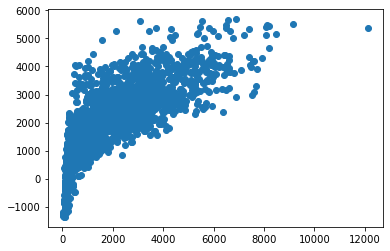

In [49]:
plt.scatter(y_val, y_pred)